# Creating a covariance and correlation matrix of stock returns 

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [7]:
end = dt.datetime.now()
start = dt.date(end.year - 1, end.month, end.day)

In [16]:
portfolio = ['GOOG', 'AAPL', 'MSFT', 'TSLA', '^GSPC', '^BSESN']

In [17]:
df = yf.download(portfolio, start, end, auto_adjust=False)['Adj Close']
df

[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Date,,,,,,
2024-07-24,217.522705,173.536896,425.636658,215.990005,80148.882812,5427.129883
2024-07-25,216.477600,168.351791,415.216553,220.250000,80039.796875,5399.220215
2024-07-26,216.945435,167.874069,422.034271,219.800003,81332.718750,5459.100098
2024-07-29,217.224106,170.312393,423.483185,232.100006,81355.843750,5463.540039
2024-07-30,217.781509,171.038910,419.702179,222.619995,81455.398438,5436.439941
...,...,...,...,...,...,...
2025-07-17,210.020004,184.699997,511.700012,319.410004,82259.242188,6297.359863
2025-07-18,211.179993,185.940002,510.049988,329.649994,81757.726562,6296.790039
2025-07-21,212.479996,191.149994,510.059998,328.489990,82200.343750,6305.600098


In [18]:
returns = df.pct_change()
returns

/tmp/ipykernel_3429/3198757542.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change()


Ticker,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Date,,,,,,
2024-07-24,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25,-0.004805,-0.029879,-0.024481,0.019723,-0.001361,-0.005143
2024-07-26,0.002161,-0.002838,0.016420,-0.002043,0.016153,0.011090
2024-07-29,0.001285,0.014525,0.003433,0.055960,0.000284,0.000813
2024-07-30,0.002566,0.004266,-0.008928,-0.040845,0.001224,-0.004960
...,...,...,...,...,...,...
2025-07-17,-0.000666,0.005061,0.012025,-0.007026,-0.004541,0.005374
2025-07-18,0.005523,0.006714,-0.003225,0.032059,-0.006097,-0.000090
2025-07-21,0.006156,0.028020,0.000020,-0.003519,0.005414,0.001399


In [19]:
returns.cov()
#indicating the positive relationship

Ticker,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Ticker,,,,,,
AAPL,0.000385,0.000192,0.000175,0.000429,0.000021,0.000182
GOOG,0.000192,0.000373,0.000169,0.000461,0.000018,0.000153
MSFT,0.000175,0.000169,0.000239,0.000333,0.000012,0.000142
TSLA,0.000429,0.000461,0.000333,0.002013,0.000022,0.000358
^BSESN,0.000021,0.000018,0.000012,0.000022,0.000069,0.000015
^GSPC,0.000182,0.000153,0.000142,0.000358,0.000015,0.000148


In [13]:
returns.var()

Ticker
AAPL     0.000399
GOOG     0.000387
MSFT     0.000248
TSLA     0.002085
^GSPC    0.000154
dtype: float64

In [20]:
returns.corr()

Ticker,AAPL,GOOG,MSFT,TSLA,^BSESN,^GSPC
Ticker,,,,,,
AAPL,1.000000,0.506280,0.577304,0.487242,0.127285,0.762446
GOOG,0.506280,1.000000,0.566253,0.531703,0.115056,0.650461
MSFT,0.577304,0.566253,1.000000,0.480138,0.093765,0.753696
TSLA,0.487242,0.531703,0.480138,1.000000,0.060047,0.655645
^BSESN,0.127285,0.115056,0.093765,0.060047,1.000000,0.146044
^GSPC,0.762446,0.650461,0.753696,0.655645,0.146044,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

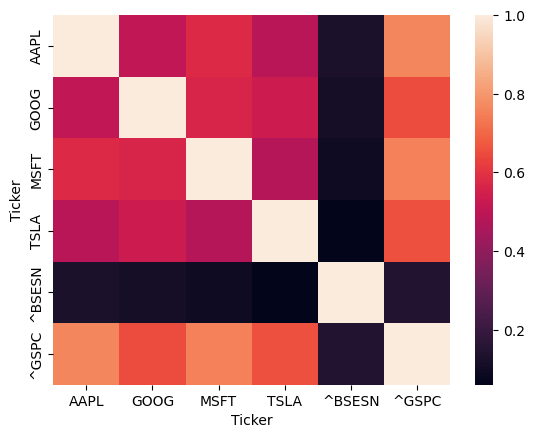

In [21]:
sns.heatmap(returns.corr())

In [ ]:
# Indian stocks have very low correlation with American stocks, the colour is dark 